#  Question 1

#   Decsion Tree Classifier Company Data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [41]:
company_data = pd.read_csv("Company_Data.csv")
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


###  Preprocessing the dataset

In [42]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [43]:
company_data['Sales'] = pd.cut(company_data.Sales, bins=(-1.0,7.49,16.27),
                               labels=['Low','High'])

In [44]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [45]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [46]:
label_encoder = preprocessing.LabelEncoder()
company_data["Sales"] = label_encoder.fit_transform(company_data["Sales"])
company_data["ShelveLoc"] = label_encoder.fit_transform(company_data["ShelveLoc"])
company_data["Urban"] = label_encoder.fit_transform(company_data["Urban"])
company_data["US"] = label_encoder.fit_transform(company_data["US"])

In [47]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


###  Splitting the dataset 

In [48]:
x = company_data.iloc[:,1:11]
y = company_data.iloc[:,0]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

###   Standardizing the dataset

In [50]:
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

###   Building Decision Tree Classifier Using Entropy 

####  Max_Depth = 3

In [51]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

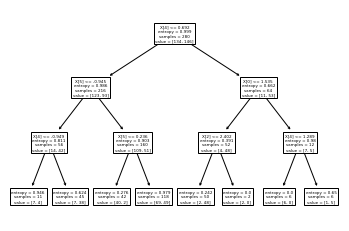

In [52]:
tree.plot_tree(model);

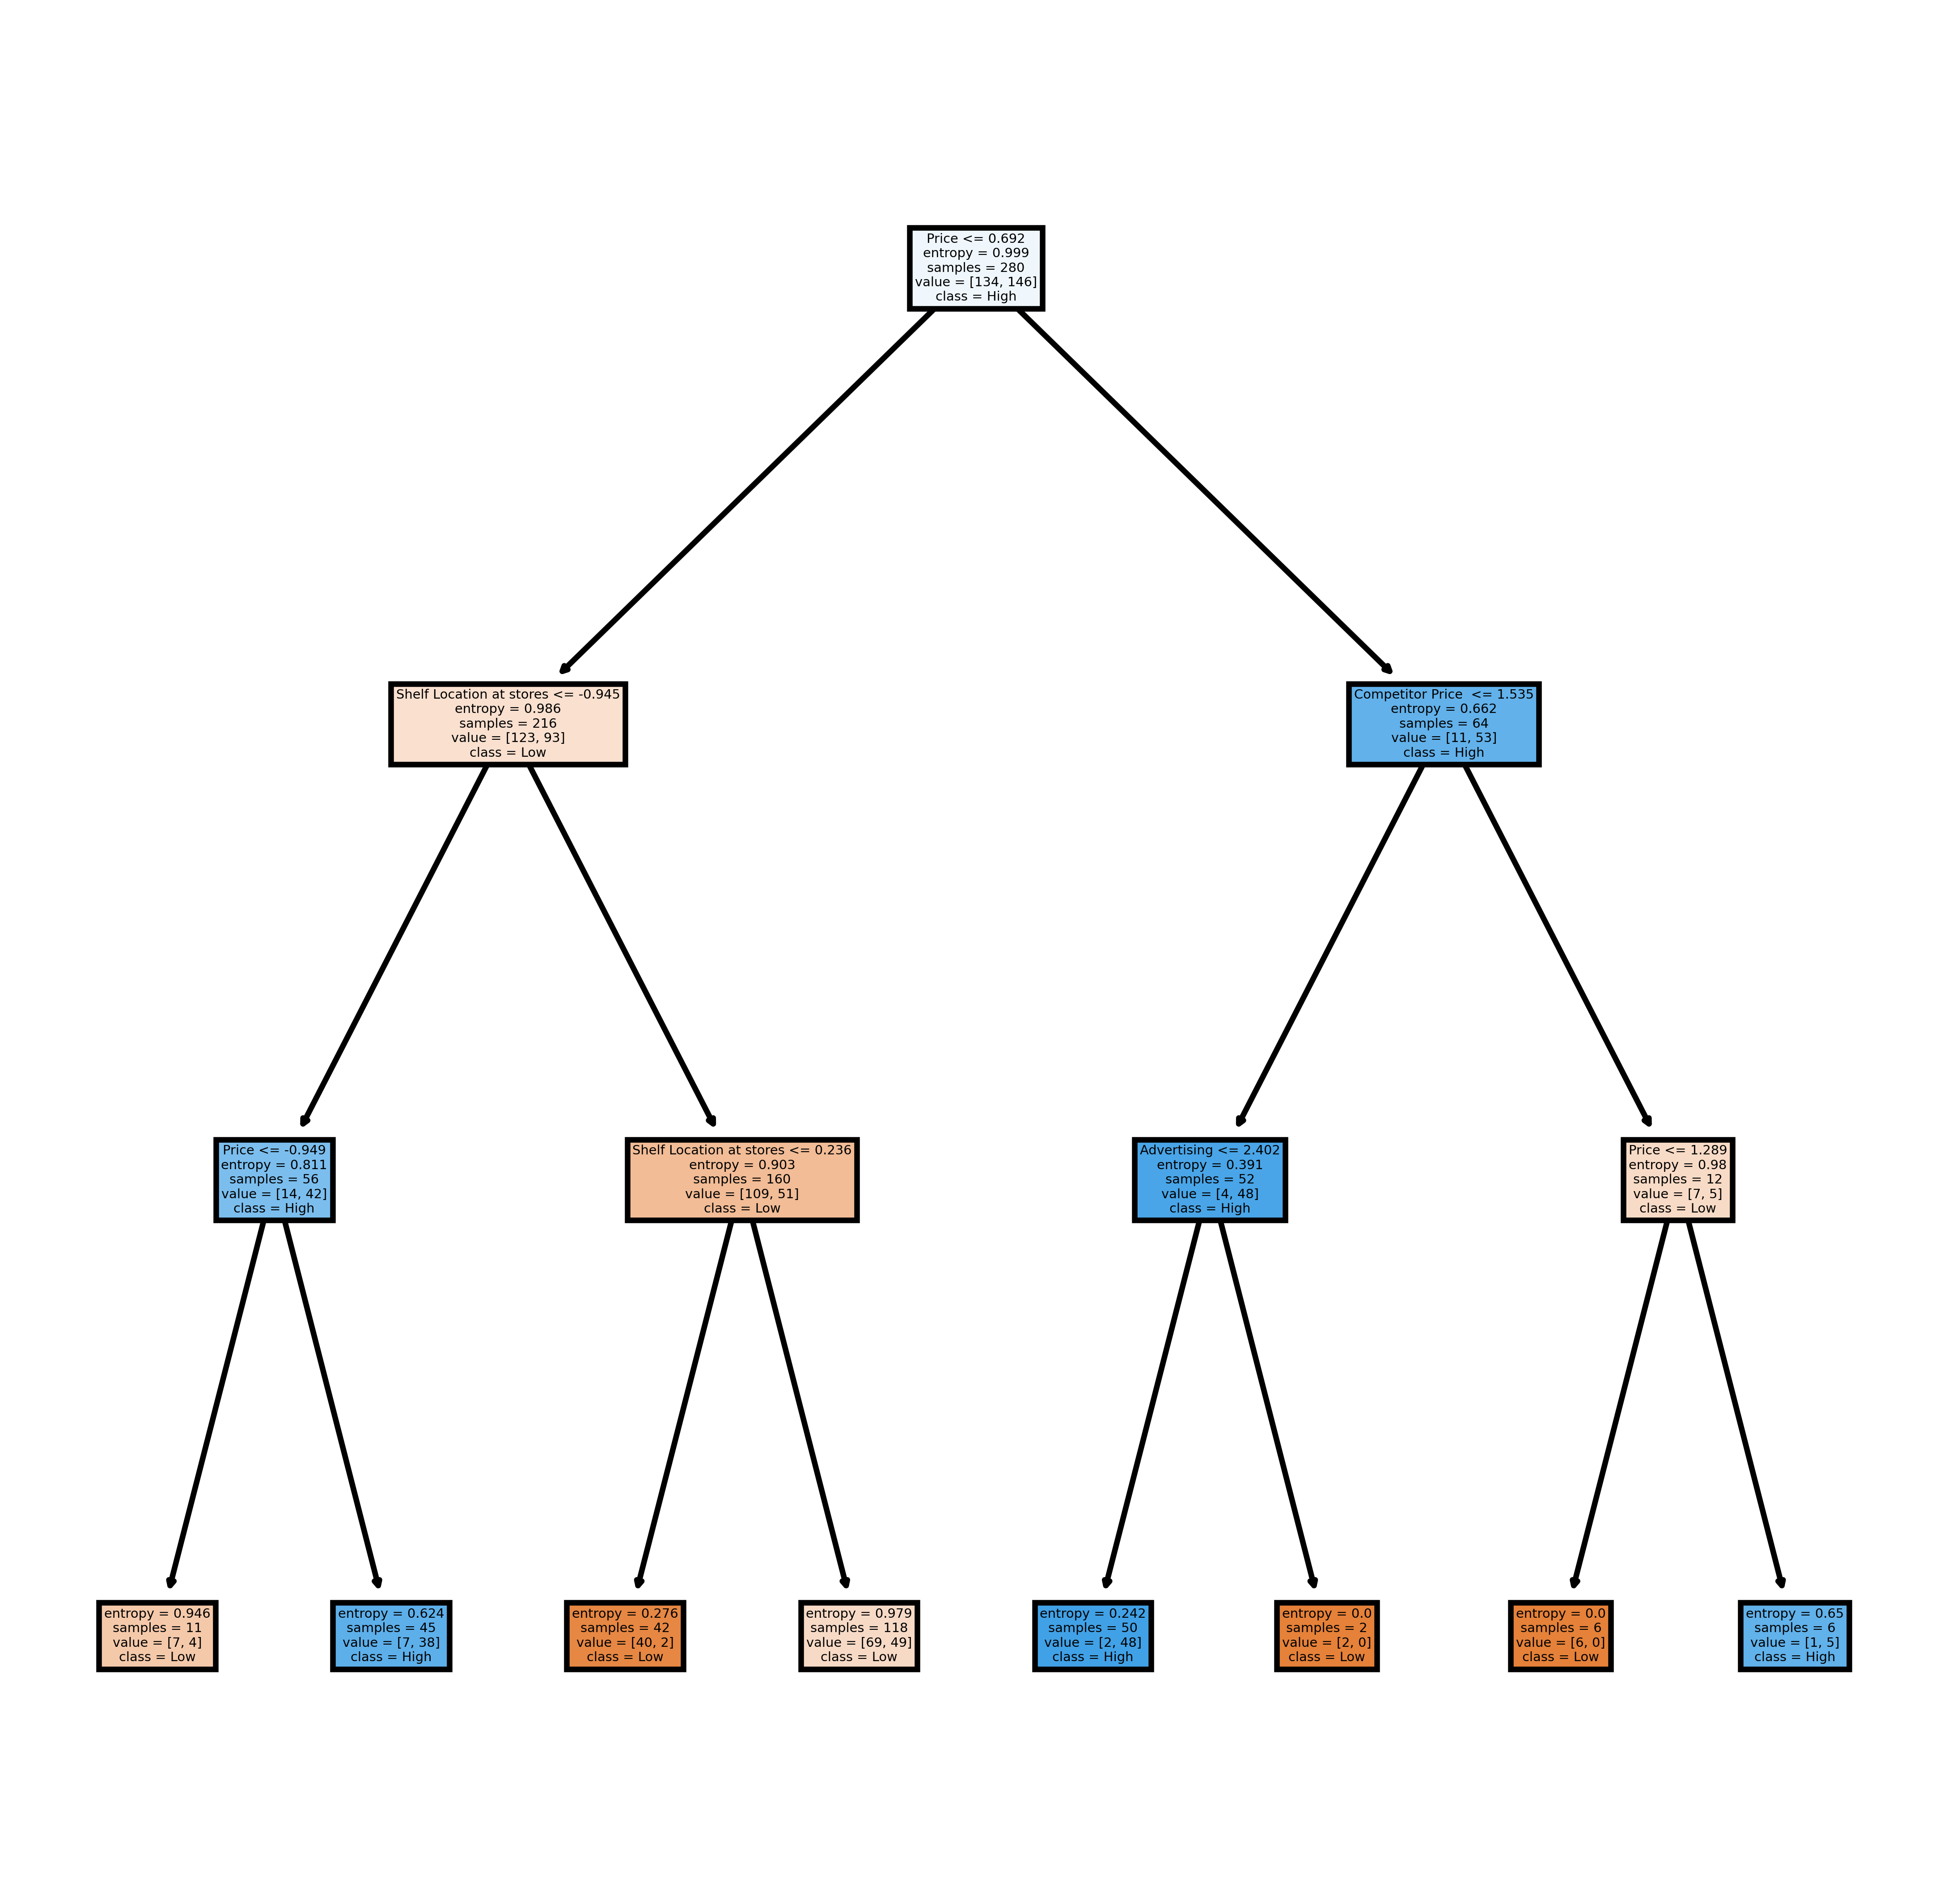

In [54]:
fn=['Competitor Price ','Income','Advertising','Population','Price','Shelf Location at stores','Age','Education','Urban','US']
cn=['Low', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [55]:
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [56]:
pd.Series(pred).value_counts()

0    80
1    40
dtype: int64

In [57]:
print('Model Accuracy is:',np.mean(pred==y_test))

Model Accuracy is: 0.675


In [58]:
pd.crosstab(y_test,pred)

col_0,0,1
Sales,,
0,53,12
1,27,28


####  Max_Depth = 5

In [59]:
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

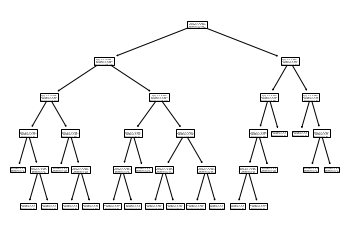

In [60]:
tree.plot_tree(model_1);

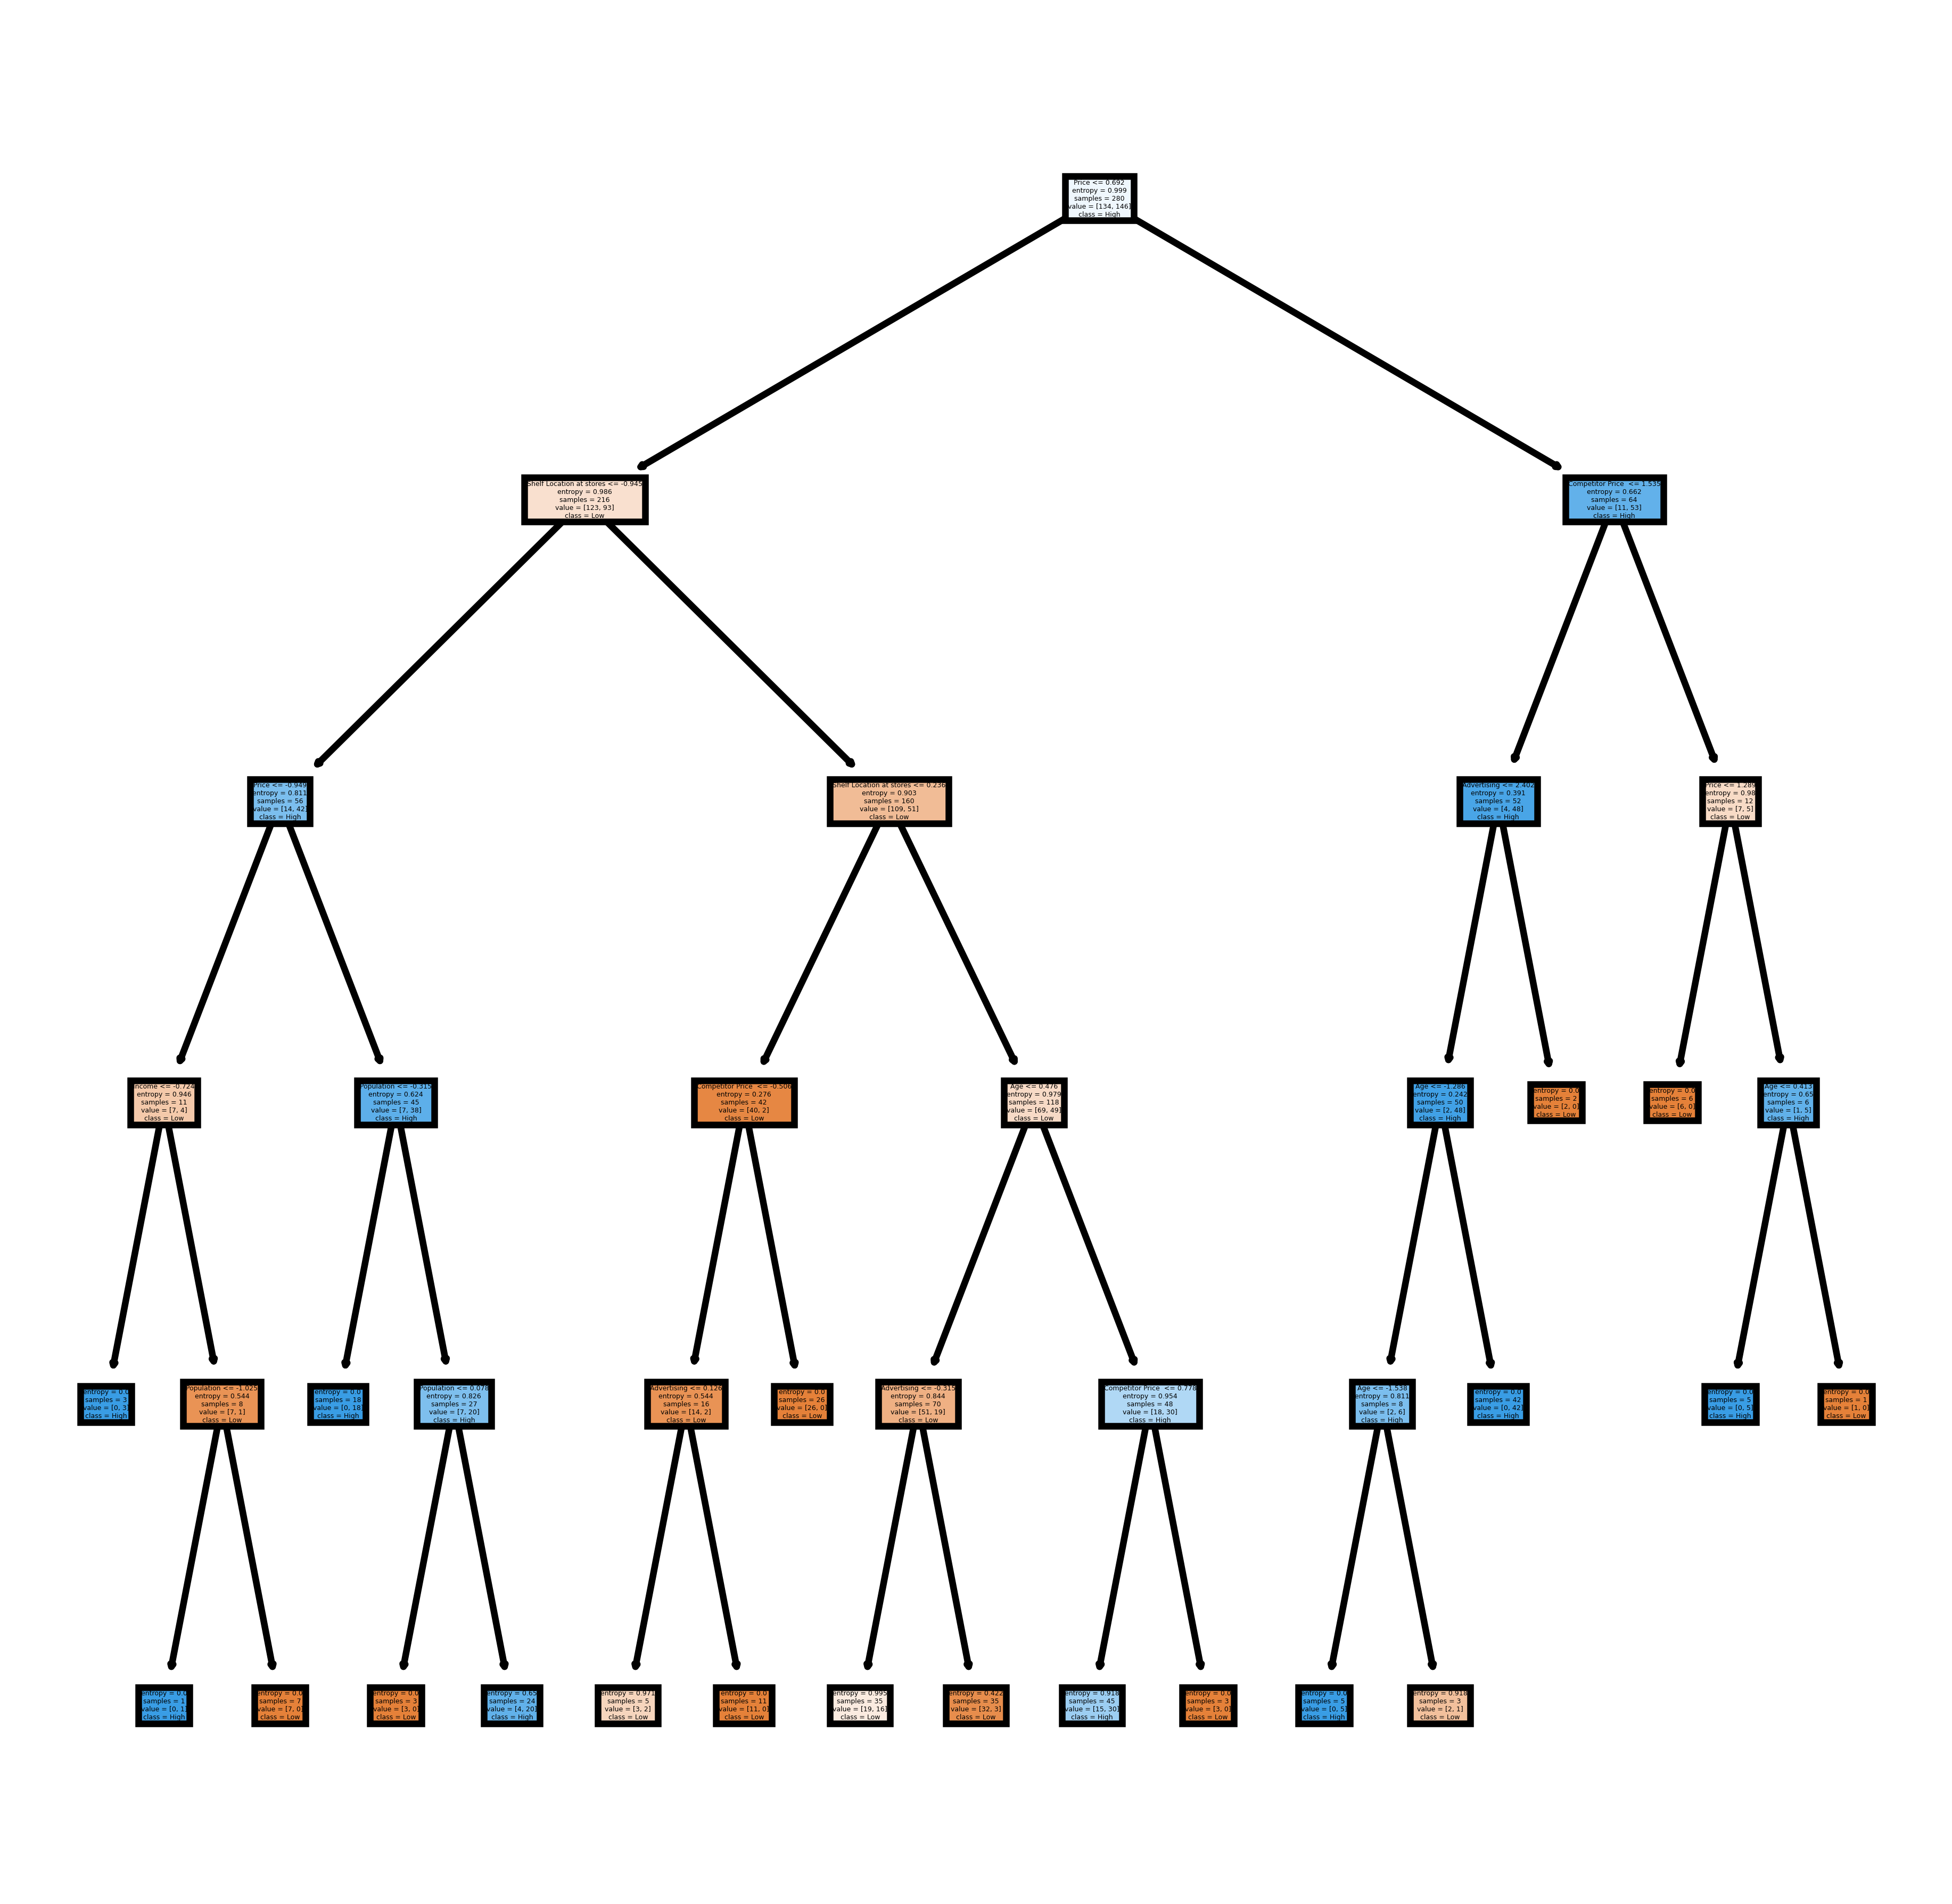

In [61]:
fn=['Competitor Price ','Income','Advertising','Population','Price','Shelf Location at stores','Age','Education','Urban','US']
cn=['Low', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=900)
tree.plot_tree(model_1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [62]:
pred_1 = model_1.predict(X_test)
pred_1

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [63]:
pd.Series(pred_1).value_counts()

1    61
0    59
dtype: int64

In [64]:
print('Model Accuracy is:',np.mean(pred_1==y_test))

Model Accuracy is: 0.7166666666666667


In [65]:
pd.crosstab(y_test,pred_1)

col_0,0,1
Sales,,
0,45,20
1,14,41


####   Max_Depth = None

In [66]:
model_2 = DecisionTreeClassifier(criterion='entropy')
model_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

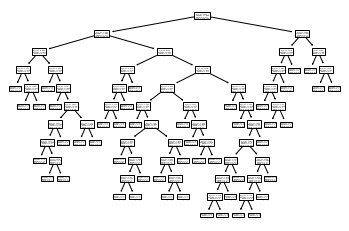

In [67]:
tree.plot_tree(model_2);

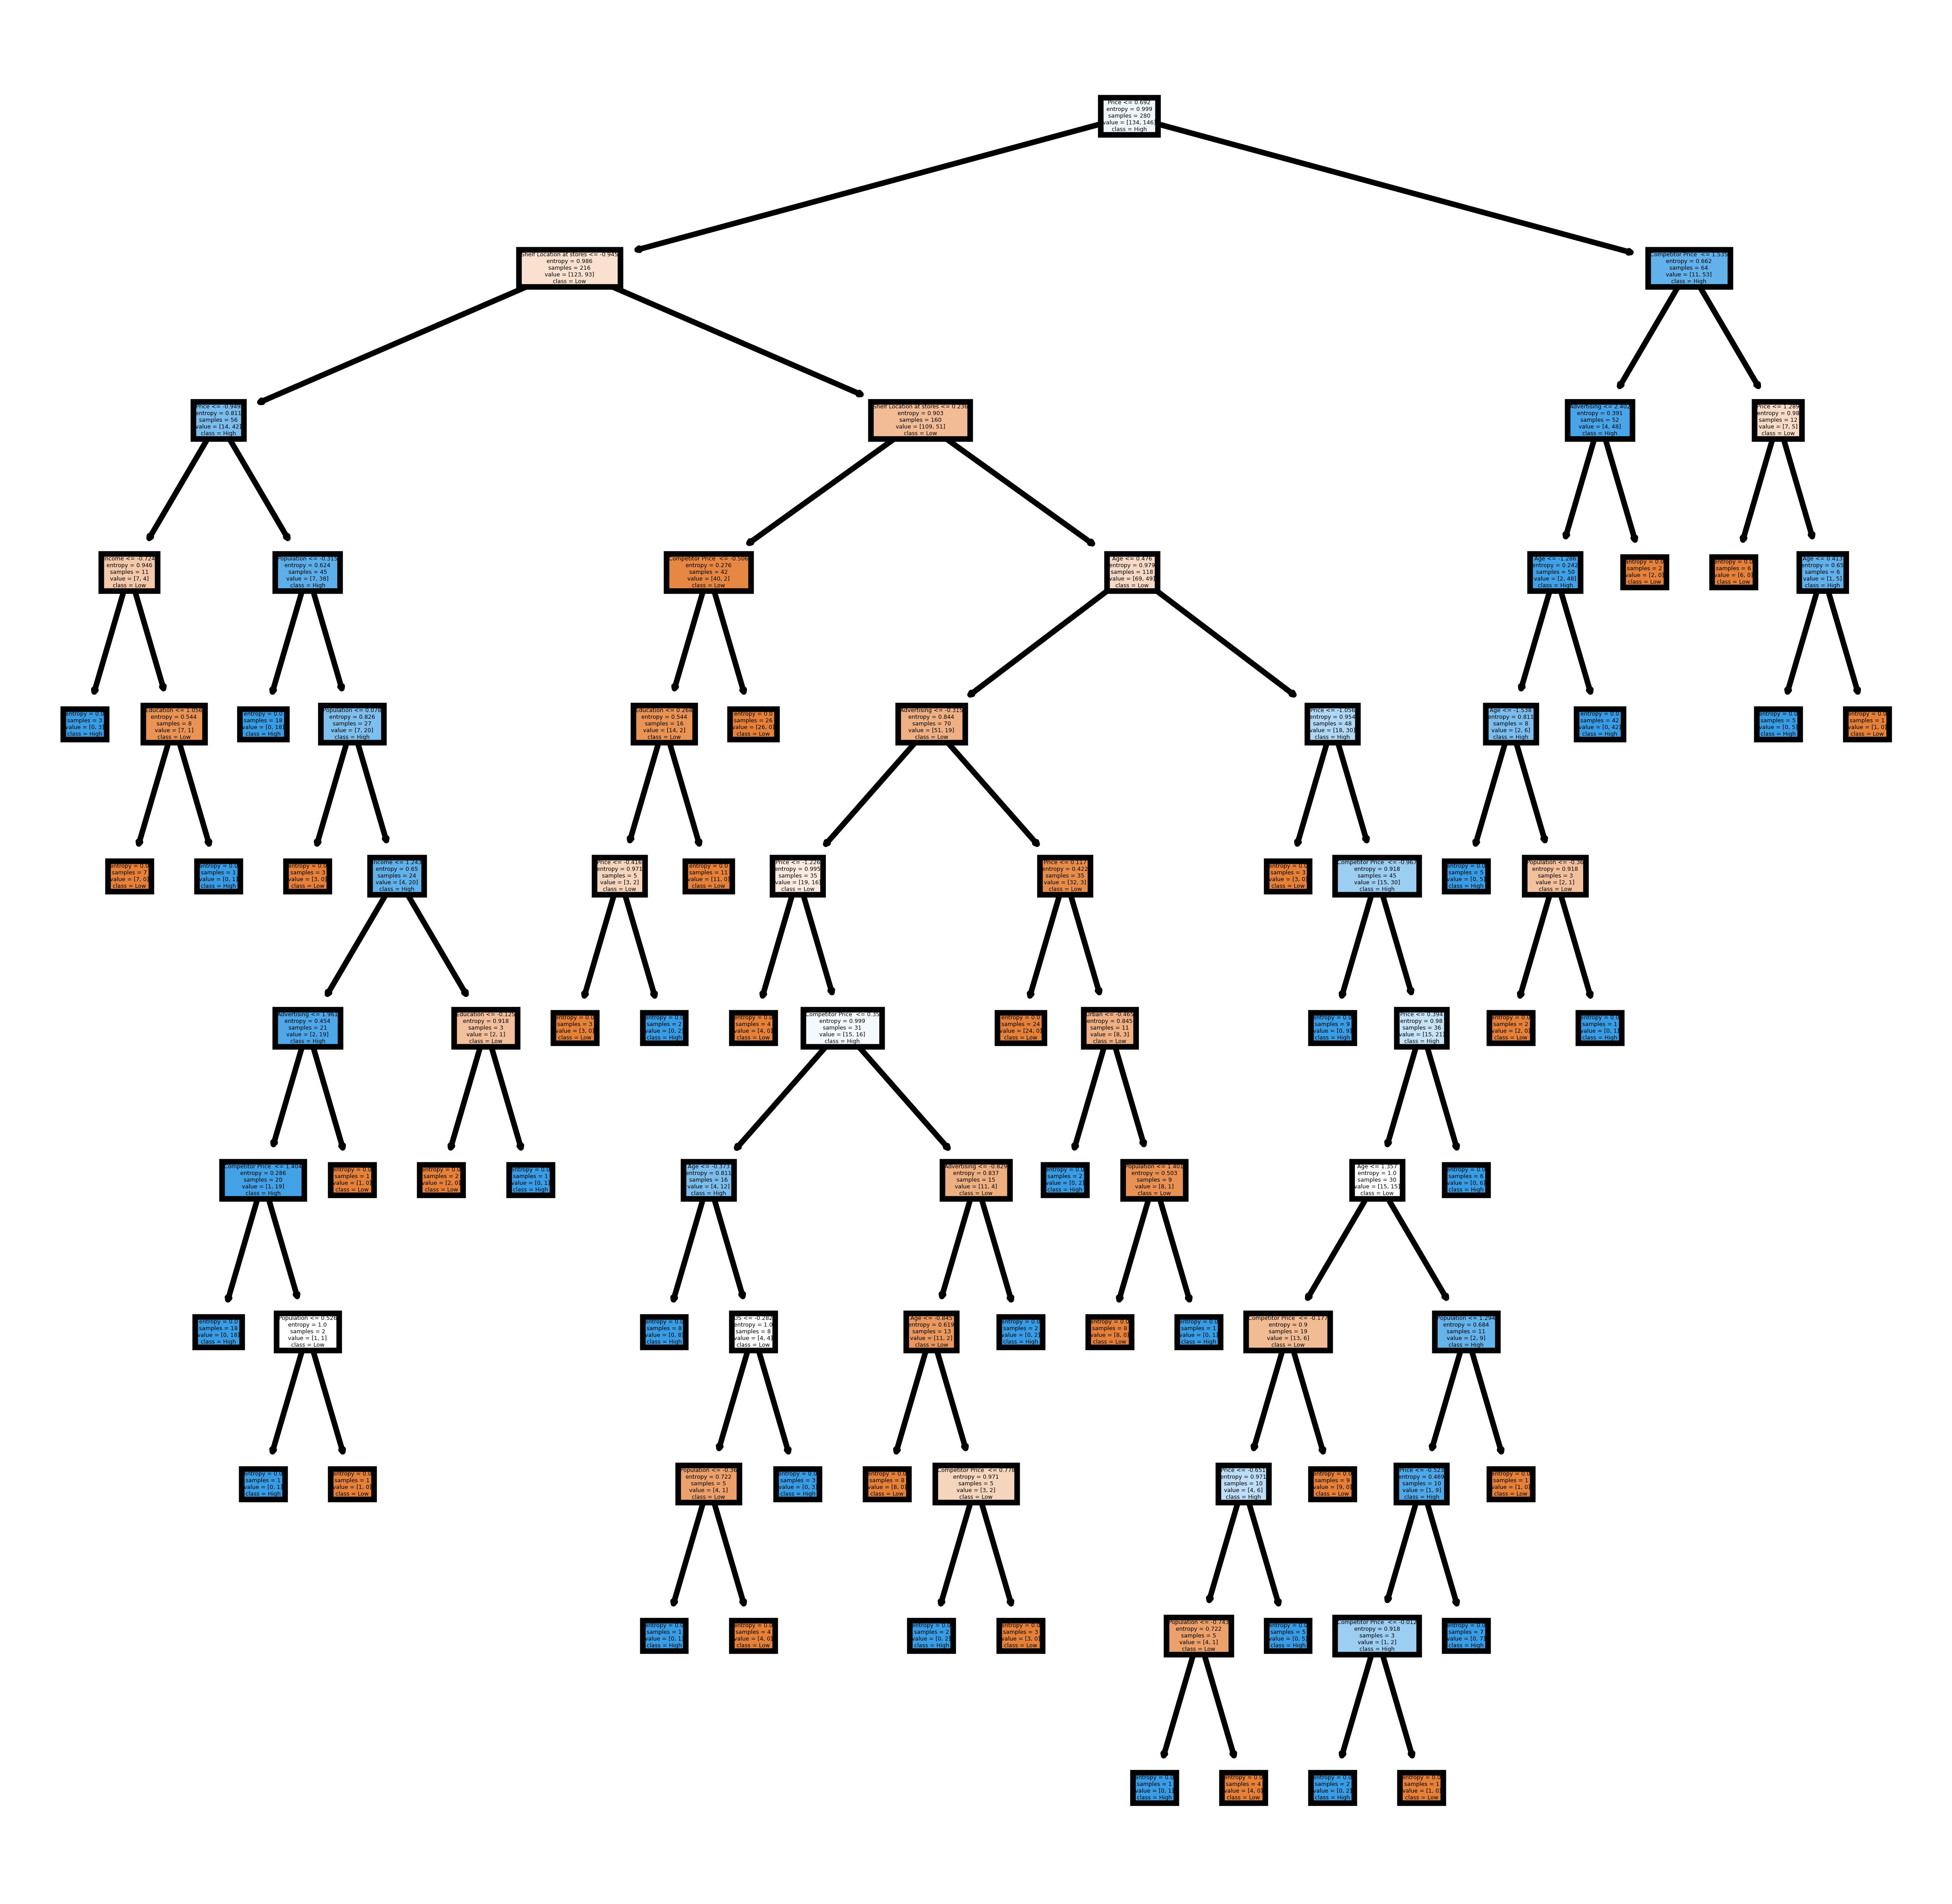

In [68]:
fn=['Competitor Price ','Income','Advertising','Population','Price','Shelf Location at stores','Age','Education','Urban','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model_2,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [69]:
pred_2 = model_2.predict(X_test)
pred_2

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [70]:
pd.Series(pred_2).value_counts()

1    71
0    49
dtype: int64

In [71]:
print('Model Accuracy is:',np.mean(pred_2==y_test))

Model Accuracy is: 0.75


In [72]:
pd.crosstab(y_test,pred_2)

col_0,0,1
Sales,,
0,42,23
1,7,48


###   We build the Decision tree Classifier using entropy method, while comparing the above 3 decision tree max_depth = None has higher accuarcy than the other two depths but we can't get the useful information from that particular tree. so we take max_depth = 3 which has an accuracy of 68% and we can understand the tree as well.

###   Building Decision Tree Classifier Using Gini 

####  Max_Depth = 3

In [73]:
model_gini_2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

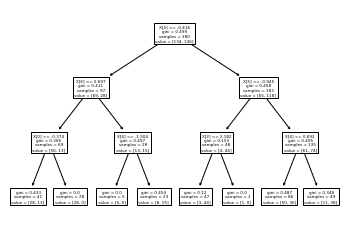

In [74]:
tree.plot_tree(model_gini_2);

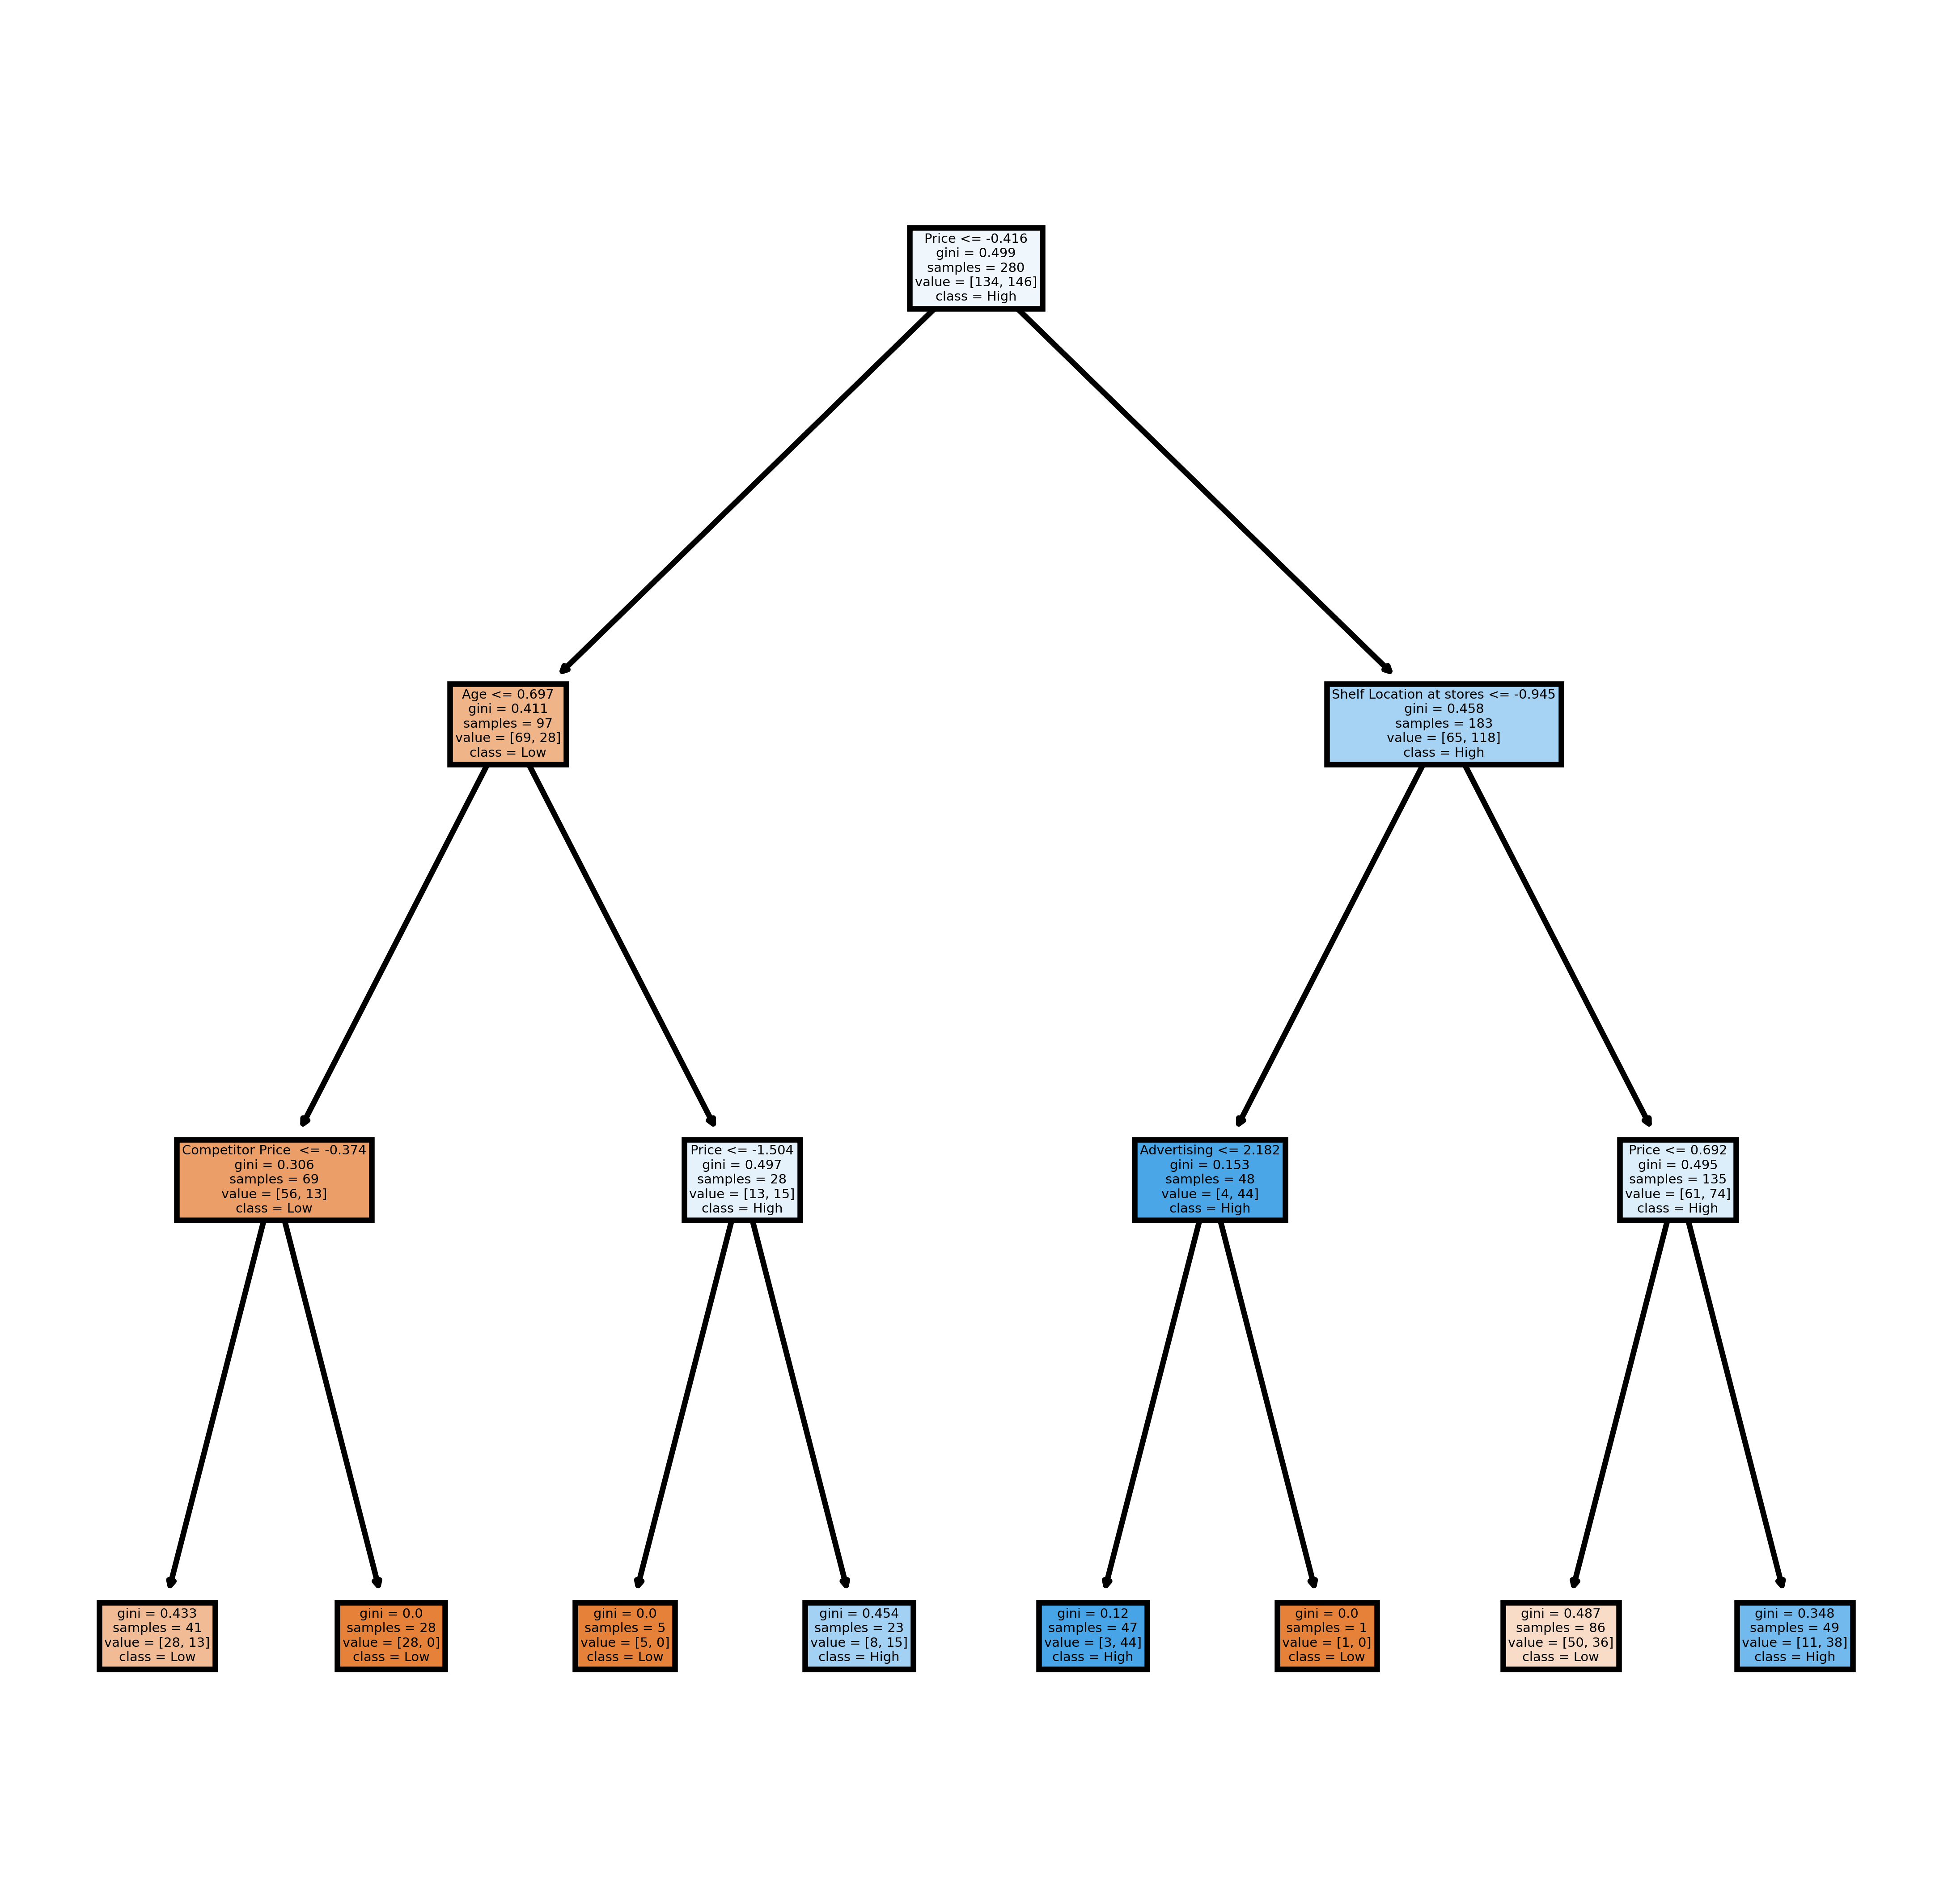

In [75]:
fn=['Competitor Price ','Income','Advertising','Population','Price','Shelf Location at stores','Age','Education','Urban','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model_gini_2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [76]:
pred_gini_2 = model_gini_2.predict(X_test)
pred_gini_2

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [77]:
pd.Series(pred_gini_2).value_counts()

0    76
1    44
dtype: int64

In [78]:
print('Model Accuracy is:',np.mean(pred_gini_2==y_test))

Model Accuracy is: 0.7083333333333334


In [79]:
pd.crosstab(y_test,pred_gini_2)

col_0,0,1
Sales,,
0,53,12
1,23,32


###  We build the Decision Tree Classifier using Gini method for max_depth = 3 and got an accuarcy of 71% also we can understand the decision tree as well 